In [5]:
import networkx as nx
import numpy as np
import grakel as gk # graph kernels module
import matplotlib.pyplot as plt
import scipy
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
import math
from tqdm import tqdm # Estimation of loop time
from datetime import datetime
import os, sys

In [6]:
df = pd.read_pickle("../data/SBM/wl_oa_10samples.pkl")
df.head(10)

,B,H0_true,N,alpha,kernel,lambda,m,n,nr_nodes_1,nr_nodes_2,...,power_avg_degree,power_avg_neigh_degree,power_distfree_b,power_distfree_u,power_max_degree,power_permutation_b,power_permutation_u,power_transitivity,run_time,timestap
0,500.0,1.0,500.0,0.025,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.016,0.014,0.0,0:01:34.044879,2021-04-06 18:46:50.068793
1,500.0,1.0,500.0,0.050,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.046,0.046,0.0,0:01:34.050862,2021-04-06 18:46:50.068793
2,500.0,1.0,500.0,0.075,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.070,0.070,0.0,0:01:34.056847,2021-04-06 18:46:50.068793
3,500.0,1.0,500.0,0.100,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.096,0.094,0.0,0:01:34.061833,2021-04-06 18:46:50.068793
4,500.0,1.0,500.0,0.125,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.122,0.122,0.0,0:01:34.066820,2021-04-06 18:46:50.068793
5,500.0,1.0,500.0,0.150,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.154,0.152,0.0,0:01:34.071807,2021-04-06 18:46:50.068793
6,500.0,1.0,500.0,0.175,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.180,0.184,0.0,0:01:34.077791,2021-04-06 18:46:50.068793
7,500.0,1.0,500.0,0.200,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.208,0.208,0.0,0:01:34.083775,2021-04-06 18:46:50.068793
8,500.0,1.0,500.0,0.225,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.236,0.236,0.0,0:01:34.089759,2021-04-06 18:46:50.068793
9,500.0,1.0,500.0,0.250,"[{'name': 'WL-OA', 'n_iter': 3}]",0.0,10.0,10.0,60.0,60.0,...,0.0,0.0,0.0,0.0,0.002,0.256,0.258,0.0,0:01:34.094745,2021-04-06 18:46:50.068793


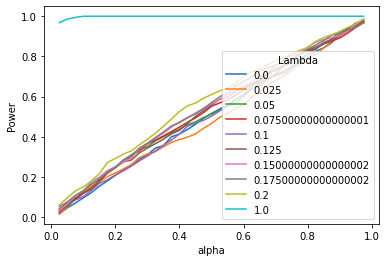

In [7]:
fig, ax = plt.subplots()

for i in np.unique(df['lambda']):
    ax.plot(df['alpha'].loc[(df['lambda'] == i)], df['power_permutation_b'].loc[(df['lambda'] == i)], '-', label=str(i))

# lines, = ax.plot(df_Binomial_WLOA['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_u'].loc[(df['p_edge_1'] == p)], 'x', label='rejections_u')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_b'].loc[(df['p_edge_1'] == p)], '*', label='rejections_statistic_b')
# lines, = ax.plot(df['nr_nodes_1'].loc[(df['p_edge_1'] == p)], 
#             df['rejections_statistic_u'].loc[(df['p_edge_1'] == p)], '+', label='rejections_statistic_u')


ax.legend(title = 'Lambda')
ax.set_xlabel('alpha')
ax.set_ylabel('Power')
plt.show()